## Download needed libraries

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys

## Read Images

In [ ]:
cells = imageio.imread("cells_scale.png")
lena = imageio.imread("lena_translate.png")
pisa = imageio.imread("pisa_rotate.png")

## Floor Function 

In [ ]:
def floor(value):
    if value >= 0:
        return int(value)
    else:
        return int(value)-1
    # Code for performing floor operation

## Bilinear Interpolation
We perform interpolation to estimate the value of the intensities at points on the target. There are other interpolation techniques that can be used but we go with bilinear interpolation here,

In [ ]:
def bilinear_interpolate(image, x, y):
    # The input image has to be zero padded before the function is called
    # Get image dimensions dx, dy
    dx, dy = np.shape(image)
    # get the shape of the original image
    dx, dy = dx-2, dy-2
    # Add 1 to xs and ys to correct for zero padding
    x, y = x+1, y+1

    # x', y', a, b as defined in the lecture
    xx, yy = floor(x), floor(y)
    a = x-xx
    b = y-yy

    if xx >= 0 and xx <= dx and yy >= 0 and yy <= dy:
        intensity = (1-a)*(1-b)*image[xx, yy] \
            + (1-a)*b*image[xx, yy+1] \
            + a*(1-b)*image[xx+1, yy] \
            + a*b*image[xx+1, yy+1]
    else:
        intensity = 0

    return intensity

## Question 1. Translation: Lena

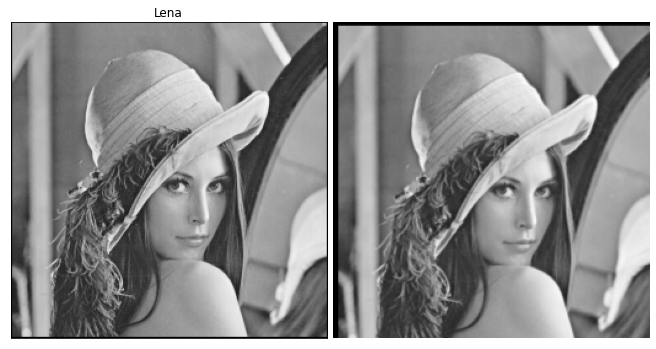

In [12]:
x, y = np.shape(lena)
image = np.zeros((x+2, y+2))
image[1:-1, 1:-1] = lena
# The image matrix is now zero padded along the margin
target_image = np.zeros((x, y))
for xt in range(x):
        for yt in range(y):
            xs = xt-3.75
            ys = yt-4.3
            # Perform translation
            val = bilinear_interpolate(image, xs, ys)
            # Perform bilinear interpolation and assign intensity value to target image
            target_image[xt, yt] = val
# Plot image and translated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.imshow(image, 'gray')
ax2.imshow(target_image, 'gray')
ax1.title.set_text('Lena')
plt.axis('off')
plt.show()

## Question 2. Rotation: Pisa

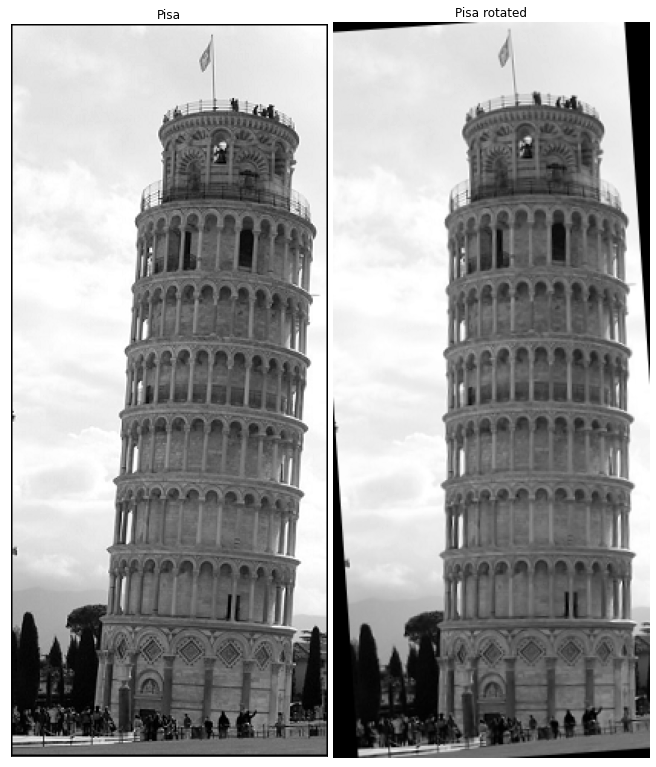

In [6]:
x, y = np.shape(pisa)
image = np.zeros((x+2, y+2))
image[1:-1, 1:-1] = pisa
# The image matrix is now zero padded along the margin
target_image = np.zeros((x, y))
image_center_x, image_center_y = x/2, y/2
# We perform rotation about the center of the image
theta = -4
# in degrees
theta *= np.pi/180
# in radians
# the image rotation is done at -4 degrees as mentioned in the lecture
for xt in range(x):
        for yt in range(y):
            # to perform rotation about the center we perform translation followed by rotation and translation back
            x_c, y_c = xt-image_center_x, yt - image_center_y
            # coordinates translated by a distance of the center
            xs = np.cos(theta)*x_c - np.sin(theta)*y_c + image_center_x
            ys = np.cos(theta)*y_c + np.sin(theta)*x_c + image_center_y
            # rotation and translation back distance of the center
            val = bilinear_interpolate(image, xs, ys)
            # Perform bilinear interpolation
            target_image[xt, yt] = val
            # Assign intensity value to target image
# Plot the image of Pisa and after rotation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.imshow(image, 'gray')
ax2.imshow(target_image, 'gray')
ax1.title.set_text('Pisa')
ax2.title.set_text('Pisa rotated')
plt.axis('off')
plt.show()

## Question 3. Scale: Cells

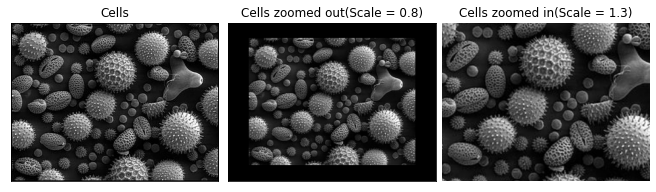

In [7]:
x, y = np.shape(cells)
image = np.zeros((x+2, y+2))
image[1:-1, 1:-1] = cells
# The image matrix is now zero padded along the margin
target_image1 = np.zeros((x, y))
target_image2 = np.zeros((x, y))
image_center_x, image_center_y = x/2, y/2
scale1 = 0.8
scale2 = 1.3
# Image is scaled about the centre. There are two outputs- one zoomed in, other zoomed out
for xt in range(x):
            for yt in range(y):
                # scale about the center as it looks more aesthetically pleasing
                # To scale around a point (x0, y0), we first translate to that point
                # Then we apply rotation as we would apply rotation around the origin
                # And then translate back
                xs = (xt-image_center_x)/scale1+image_center_x
                ys = (yt-image_center_y)/scale1+image_center_y
                val = bilinear_interpolate(image, xs, ys)
                target_image1[xt, yt] = val
                xs = (xt-image_center_x)/scale2+image_center_x
                ys = (yt-image_center_y)/scale2+image_center_y
                val = bilinear_interpolate(image, xs, ys)
                target_image2[xt, yt] = val
# Plot outputs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,12), constrained_layout=True)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax1.imshow(image, 'gray')
ax2.imshow(target_image1, 'gray')
ax3.imshow(target_image2, 'gray')
ax1.title.set_text('Cells')
ax2.title.set_text('Cells zoomed out(Scale = 0.8)')
ax3.title.set_text('Cells zoomed in(Scale = 1.3)')
plt.axis('off')
plt.show()

## Observations 

1. Image interpolation can be done through nearest neighbor or bilinear interpolation or bicubic interpolation. Herein, we have used bilinear interpolation.
2. Performing the interpolation allows for the transformed image to not have holes.
3. In image scaling we observe that when the scale is less than 1, the image is zoomed out and when greater than 1, zoomed in.